<a href="https://colab.research.google.com/github/pswoo0323/2023.AI/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B5%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house_price (1).txt', names=['size', 'price'])
print(data)

X = data['size']
y = data['price']
m = len(data)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         size  price
0   27.575758   6.10
1   26.969697   3.80
2   36.969697   5.70
3   13.636364   1.80
4   56.969697  13.00
5   29.090909   6.20
6   80.303030  12.00
7   51.515152   9.00
8   34.848485   5.30
9   18.484848   1.70
10  30.909091   3.80
11  33.939394   5.80
12  26.060606   3.70
13  32.424242   8.50
14  32.121212   4.70
15  31.818182   4.70
16  30.909091   6.00
17  36.969697   5.00
18  32.424242   6.50
19  33.030303   6.50
20  27.575758   7.00
21  20.000000   2.70
22  25.454545   8.60
23  31.818182   6.20
24  32.424242   5.80
25  32.424242   8.19
26  28.484848   5.09
27  32.424242   8.00
28  37.272727   6.10
29  25.757576   5.90
30  23.333333   6.00
31  31.515152   7.20
32  33.333333   8.50
33  19.393939   3.90
34  33.030303   8.50
35  20.909091   2.50
36  33.636364   5.00
37  21.212121   2.35
38  30.606061   3.30
39  30.909091   4.50
40  29.393

In [5]:

X = (np.array(X)).reshape(m, 1)
y = (np.array(y)).reshape(m, 1)
print(X.shape, y.shape)


(52, 1) (52, 1)


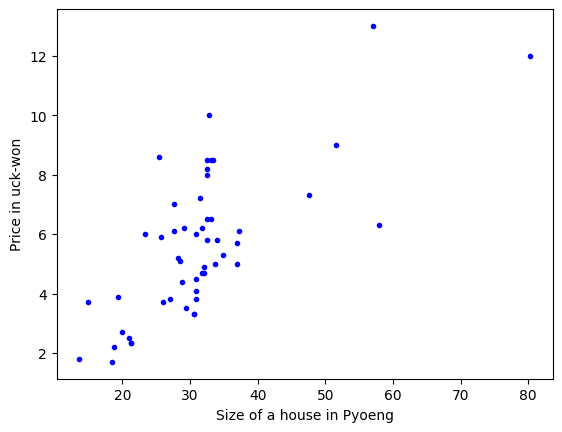

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(X,y,'b.')
plt.xlabel("Size of a house in Pyoeng")
plt.ylabel("Price in uck-won")
plt.show()

Optimized Parameters: [[0.007878  ]
 [0.17556765]]


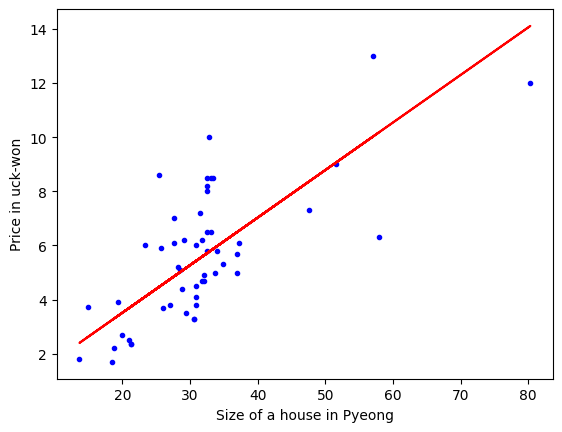

In [7]:
X_b = np.c_[np.ones((m, 1)), X]

learning_rate = 0.0001
max_iter = 200
theta = np.zeros((2, 1))
gradients = np.zeros((2, 1))

for i in range(max_iter):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

print("Optimized Parameters:", theta)

plt.plot(X, y, 'b.')
plt.plot(X, X_b.dot(theta), 'r')
plt.xlabel("Size of a house in Pyeong")
plt.ylabel("Price in uck-won")
plt.show()

In [8]:
X_new = np.array([[10], [90]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta)
print ("10평과 90평 집의 예측 가격")
print ( y_predict)

10평과 90평 집의 예측 가격
[[ 1.76355445]
 [15.80896606]]


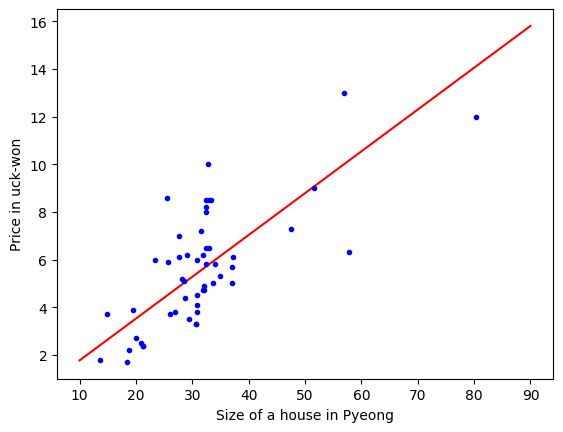

In [9]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.xlabel("Size of a house in Pyeong")
plt.ylabel("Price in uck-won")
plt.show()

In [10]:
X_mine = np.array([[25]])
X_mine_b = np.c_[np.ones((1,1)), X_mine]
y_predict = X_mine_b.dot(theta)
print (y_predict,"억원")

[[4.39706913]] 억원


In [11]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=100, penalty = None, eta0=0.0001)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.0001, max_iter=100, penalty=None)

theta:
[0.00634736] [0.17583617]


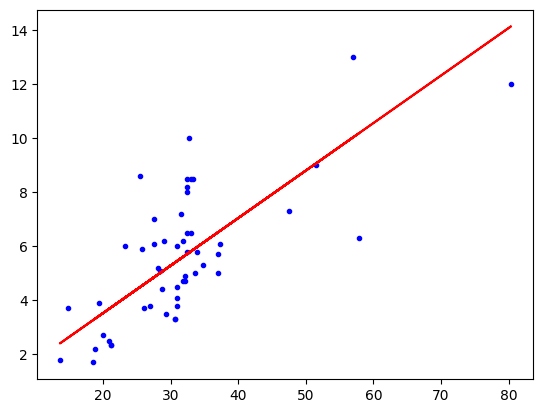

In [12]:
print ("theta:")
print (sgd_reg.intercept_, sgd_reg.coef_)

y_pred = sgd_reg.predict(X)
plt.plot(X,y,'b.')
plt.plot(X,y_pred, 'r')
plt.show()


In [13]:
def ComputeJ(t0, t1, X, y):
  m= len(X)
  X_b = np.c[np.ones((m,1)),X]
  theta = np.array([(t0,t1)])

  cost_vector = X_b.dot(theta)-y

  cost_vector = cost_vector.reshape(-1)

  cost2 = np.square(cost_vector)
  cost_sum = np.sum(cost2)/ (2*m)

  return cost_sum
